**Reproduction of Figure 5A from Bachmann *et al.***

This Colaboratory notebook creates an SED-ML file to partially reproduce  Figure 5A from Bachmann *et al.* 2011([Link](https://doi.org/10.1038/msb.2011.50)).

Version: 2.0
Date: 2021-06-28

In [ ]:
# install Tellurium
!pip3 install tellurium

In [2]:
# import required packages
import os
import tellurium as te
import phrasedml

In [3]:
# mount Google Drive if necessary
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# set working directory to a subfolder "experiment" of the folder containing this file, change file path for workingDir as required
workingDir = '/content/drive/My Drive/bachmann_archiv/Group4_GenerationSEDML/Tellurium/experiment/'
os.chdir(workingDir)

In [5]:
# retrieve SBML model from model folder and set as reference for phraSEDML
sbml = "../model/Bachmann2011.xml"
ant_str = te.sbmlToAntimony(sbml)
sbml_str = te.antimonyToSBML(ant_str)
phrasedml.setReferencedSBML('../model/Bachmann2011.xml', sbml_str)
# print(sbml_str)

True

In [6]:
# create phraSEDML string as template for SED-ML
phrasedml_str = """
    model1 = model "{}"
    model2 = model model1 with SOCS3oe=1
    model3 = model model1 with CISoe=1
    
    sim1 = simulate uniform(0, 80, 1000)
    task1 = run sim1 on model1
    task2 = run sim1 on model2
    task3 = run sim1 on model3

    plot "Figure 5A Nuclear pSTAT5" task1.time vs task1.npSTAT5, task2.npSTAT5, task3.npSTAT5

    report "Report Figure 5A" task1.time, task1.npSTAT5, task2.npSTAT5, task3.npSTAT5

""".format('../model/Bachmann2011.xml')

In [8]:
# convert to SED-ML and create SED-ML file in working directory
sedml_str = phrasedml.convertString(phrasedml_str)
if sedml_str == None:
    raise RuntimeError(phrasedml.getLastError())
print(sedml_str)

with open(os.path.join(workingDir, 'Fig5.sedml'), 'wb') as f:
    f.write(sedml_str.encode('utf-8'))

<?xml version="1.0" encoding="UTF-8"?>
<!-- Created by phraSED-ML version v1.1.1 with libSBML version 5.19.1. -->
<sedML xmlns="http://sed-ml.org/sed-ml/level1/version3" level="1" version="3">
  <listOfModels>
    <model id="model1" language="urn:sedml:language:sbml.level-2.version-1" source="../model/Bachmann2011.xml"/>
    <model id="model2" language="urn:sedml:language:sbml.level-2.version-1" source="model1">
      <listOfChanges>
        <changeAttribute target="/sbml:sbml/sbml:model/sbml:listOfParameters/sbml:parameter[@id='SOCS3oe']/@value" newValue="1"/>
      </listOfChanges>
    </model>
    <model id="model3" language="urn:sedml:language:sbml.level-2.version-1" source="model1">
      <listOfChanges>
        <changeAttribute target="/sbml:sbml/sbml:model/sbml:listOfParameters/sbml:parameter[@id='CISoe']/@value" newValue="1"/>
      </listOfChanges>
    </model>
  </listOfModels>
  <listOfSimulations>
    <uniformTimeCourse id="sim1" initialTime="0" outputStartTime="0" outputEn

/usr/local/lib/python3.7/dist-packages/roadrunner/roadrunner.py:3944: UserWarning:

Simulation requested end point (80.0) not reached, because the maximum number of steps reached.  Possible solutions include:
  * Setting an explicit number of points (i.e. r.simulate(0.0, 80.0, 1001)
  * Setting r.integrator.variable_step_size to 'False'
* Setting 



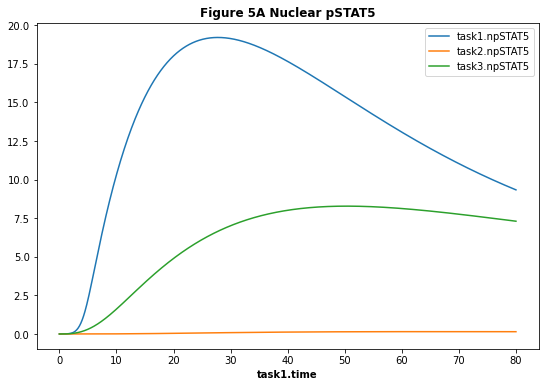

In [9]:
# run the SED-ML file based on the referenced SBML file in ../models/
workingDir = '/content/drive/My Drive/bachmann_archiv/Group4_GenerationSEDML/Tellurium/experiment/'
os.chdir(workingDir)
te.executeSEDML(sedml_str, workingDir)